In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

In [4]:
data={
    "Date":pd.date_range(start="2024-1-1",periods=10,freq="D"),
    "Region":["n","s","e","w","c","n","s","e","w","c"],
    "Confirmed_Cases":[100,200,250,300,350,345,213,897,324,657],
    "Recorded_Cases":[95,190,140,290,240,120,210,160,340,270],
    "Deaths":[2,5,3,7,6,3,6,4,8,7]
}

In [6]:
df=pd.DataFrame(data)
df.head(10)

,Date,Region,Confirmed_Cases,Recorded_Cases,Deaths
0,2024-01-01,n,100,95,2
1,2024-01-02,s,200,190,5
2,2024-01-03,e,250,140,3
3,2024-01-04,w,300,290,7
4,2024-01-05,c,350,240,6
5,2024-01-06,n,345,120,3
6,2024-01-07,s,213,210,6
7,2024-01-08,e,897,160,4
8,2024-01-09,w,324,340,8
9,2024-01-10,c,657,270,7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


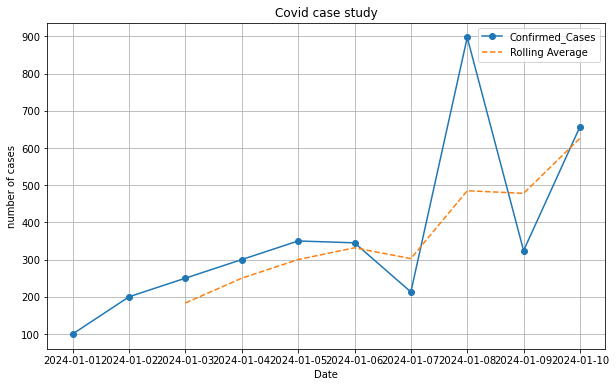

In [12]:
df["Date"]=pd.to_datetime(df["Date"])
df["Rolling_Avg"]=df["Confirmed_Cases"].rolling(window=3).mean()
label_encoder=LabelEncoder()
df["Region_Encoder"]=label_encoder.fit_transform(df["Region"])
iso_forest=IsolationForest(contamination=0.2)
df["Anomaly"]=iso_forest.fit_predict(df[["Confirmed_Cases","Recorded_Cases","Deaths","Region_Encoder"]])
plt.figure(figsize=(10,6))
plt.plot(df["Date"],df["Confirmed_Cases"],label="Confirmed_Cases",marker="o")
plt.plot(df["Date"],df["Rolling_Avg"],label="Rolling Average",linestyle="--")
plt.title("Covid case study")
plt.xlabel("Date")
plt.ylabel("number of cases")
plt.legend()
plt.grid(True)
plt.show()


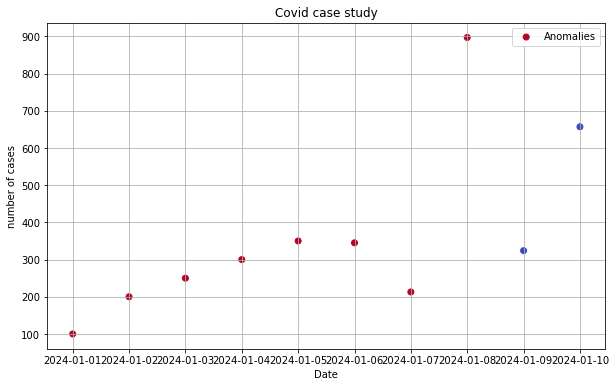

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(df["Date"],df["Confirmed_Cases"],c=df["Anomaly"],cmap="coolwarm",label="Anomalies")
plt.title("Covid case study")
plt.xlabel("Date")
plt.ylabel("number of cases")
plt.legend()
plt.grid(True)
plt.show()

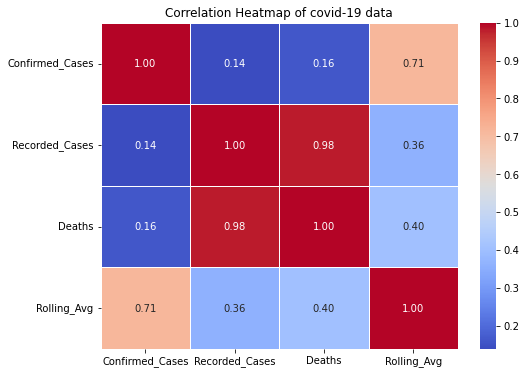

In [17]:
correlation_matrix=df[["Confirmed_Cases","Recorded_Cases","Deaths","Rolling_Avg"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f",linewidth=1)
plt.title("Correlation Heatmap of covid-19 data")
plt.show()